In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Importing the dataset
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Load the CSV into a DataFrame
layoff_df = pd.read_csv("/punith/Dataset/layoffs_data.csv")

Saving layoffs_data.csv to layoffs_data (2).csv


In [ ]:
layoff_df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
0,Oda,Oslo,Food,150.0,2024-06-05,https://techcrunch.com/2024/06/05/softbank-bac...,691.0,Unknown,2024-06-05 18:01:25,Norway,NaN,Unknown
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.20,Unknown
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.30,Unknown
3,MoonPay,Dover,Crypto,30.0,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.10,Unknown
4,Yext,New York City,Marketing,NaN,2024-06-05,https://www.investing.com/news/economy-news/ye...,117.0,Post-IPO,2024-06-05 18:02:40,United States,0.12,Unknown


In [ ]:
# Calculate the mean of the 'Percentage' column
mean_percentage = layoff_df['Percentage'].mean()

#  Compare each value in 'Percentage' with the calculated mean
# This creates a boolean Series (True for >= mean, False for < mean)
risk_boolean = layoff_df['Percentage'] >= mean_percentage

# Convert the boolean values (True/False) to integers (1 for True, 0 for False)
risk_binary = risk_boolean.astype(int)

# Create a new column 'Risk' in the DataFrame and assign the binary values
layoff_df['Risk'] = risk_binary

In [ ]:
# Printing the first few rows of the Dataset
layoff_df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off,Risk
0,Oda,Oslo,Food,150.0,2024-06-05,https://techcrunch.com/2024/06/05/softbank-bac...,691.0,Unknown,2024-06-05 18:01:25,Norway,NaN,Unknown,0
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.20,Unknown,0
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.30,Unknown,1
3,MoonPay,Dover,Crypto,30.0,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.10,Unknown,0
4,Yext,New York City,Marketing,NaN,2024-06-05,https://www.investing.com/news/economy-news/ye...,117.0,Post-IPO,2024-06-05 18:02:40,United States,0.12,Unknown,0


In [ ]:
# Dropping the null values or empty values
layoff_df=layoff_df.dropna()

In [ ]:
#Printing after dropping the empty values
layoff_df

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off,Risk
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.20,Unknown,0
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.30,Unknown,1
3,MoonPay,Dover,Crypto,30.0,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.10,Unknown,0
6,OrCam,Jerusalem,Healthcare,100.0,2024-06-03,https://www.calcalistech.com/ctechnews/article...,86.0,Unknown,2024-06-04 03:47:34,Israel,0.50,Unknown,1
13,Walnut,New York City,Sales,15.0,2024-05-29,https://www.calcalistech.com/ctechnews/article...,56.0,Series B,2024-05-31 10:49:24,United States,0.20,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3635,Inspirato,Denver,Travel,130.0,2020-03-16,https://businessden.com/2020/03/16/inspirato-c...,79.0,Series C,2020-03-31 14:45:56,United States,0.22,Unknown,0
3636,Help.com,Austin,Support,16.0,2020-03-16,LinkedIn,6.0,Seed,2020-04-16 06:36:06,United States,1.00,Unknown,1
3638,HopSkipDrive,Los Angeles,Transportation,8.0,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,0.10,Unknown,0
3639,Panda Squad,SF Bay Area,Consumer,6.0,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,0.75,Unknown,1


In [ ]:
# Data preparation for classification taking only the relevant columns
feature_columns = ['Stage','Funds_Raised','Laid_Off_Count', 'Industry', 'Country', 'Location_HQ']
layoff_df = layoff_df[feature_columns + ['Risk']]

# Encode categorical variables: Encoding categorical variables is done in machine learning classification because models require numerical input.
#Categorical data must be converted into a numerical format to enable algorithms to process it and learn meaningful patterns effectively.
# Identify categorical columns
categorical_cols = ['Stage', 'Industry', 'Country', 'Location_HQ']
encoder = LabelEncoder()
for col in categorical_cols:
    layoff_df[col] = encoder.fit_transform(layoff_df[col])

<ipython-input-10-3c1517f539d9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layoff_df[col] = encoder.fit_transform(layoff_df[col])
<ipython-input-10-3c1517f539d9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layoff_df[col] = encoder.fit_transform(layoff_df[col])
<ipython-input-10-3c1517f539d9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

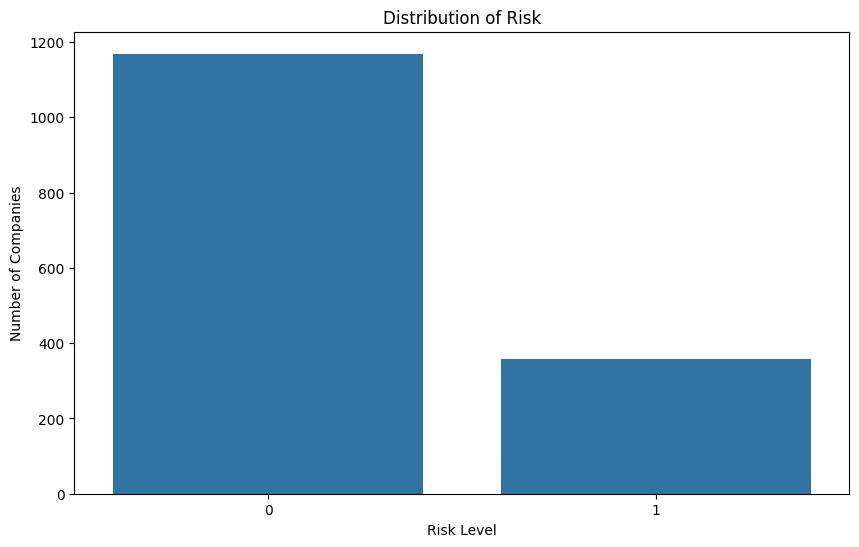

In [ ]:
# prompt: genrate graph showing distriubution of risk column

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'layoff_df' is already defined as in the provided code

# Generate the distribution plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Risk', data=layoff_df)
plt.title('Distribution of Risk')
plt.xlabel('Risk Level')
plt.ylabel('Number of Companies')
plt.show()

Before SMOTE: Counter({0: 1169, 1: 357})
After SMOTE: Counter({0: 1169, 1: 1169})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


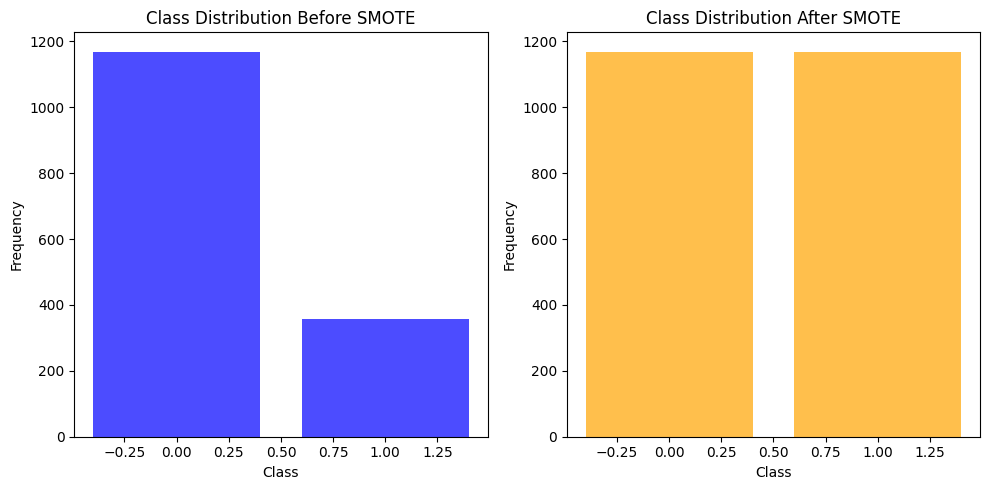

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate features (X) and target variable (y)
X = layoff_df.drop('Risk', axis=1)
y = layoff_df['Risk']

# Print class distribution before SMOTE
print("Before SMOTE:", Counter(y))

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)  # Initialize SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y) # Fit and resample


# Print class distribution after SMOTE
print("After SMOTE:", Counter(y_resampled))

import matplotlib.pyplot as plt

# Class distribution before and after SMOTE
before_smote = Counter(y)
after_smote = Counter(y_resampled)

# Create separate plots
plt.figure(figsize=(10, 5))

# Plot Before SMOTE
plt.subplot(1, 2, 1)
plt.bar(before_smote.keys(), before_smote.values(), color='blue', alpha=0.7)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Frequency")

# Plot After SMOTE
plt.subplot(1, 2, 2)
plt.bar(after_smote.keys(), after_smote.values(), color='orange', alpha=0.7)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Frequency")

# Adjust layout and display
plt.tight_layout()
plt.show()

# Split the resampled data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Now you can proceed with training your model using X_train and y_train

In [ ]:
#Encoded features
X.head()

,Stage,Funds_Raised,Laid_Off_Count,Industry,Country,Location_HQ
1,1,2000.0,100.0,8,19,125
2,15,119.0,30.0,10,19,125
3,15,651.0,30.0,4,39,37
6,15,86.0,100.0,13,19,54
13,5,56.0,15.0,25,39,88


Random Forest Accuracy: 0.8098
Random Forest Precision: 0.7843
Confusion Matrix:
[[179  55]
 [ 34 200]]


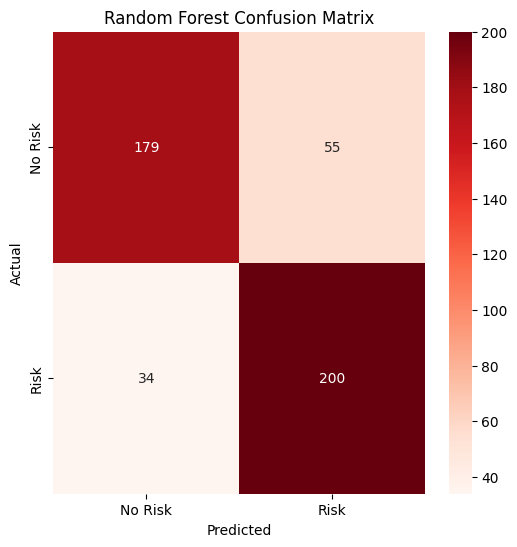

In [ ]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Random Forest classifier model
random_forest = RandomForestClassifier(random_state=42)
#The `random_state=42` sets a fixed seed for the random number generator, ensuring reproducibility in processes that involve randomness (like data splitting or model initialization).
#This allows you to get the same results each time you run the code, which is useful for consistency and debugging.
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Print evaluation metrics
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Confusion Matrix:\n{cm_rf}")
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds', xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree Accuracy: 0.7671
Decision Tree Precision: 0.7432
Decision Tree Confusion Matrix:
[[168  66]
 [ 43 191]]


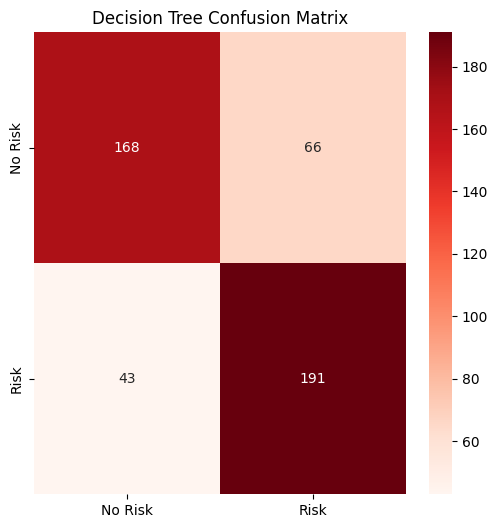

In [ ]:
# DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree)

print(f"Decision Tree Accuracy: {accuracy_tree:.4f}")
print(f"Decision Tree Precision: {precision_tree:.4f}")
print(f"Decision Tree Confusion Matrix:\n{cm_tree}")

plt.figure(figsize=(6, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Reds', xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.title('Decision Tree Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:41:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8205
XGBoost Precision: 0.7885
XGBoost Confusion Matrix:
[[179  55]
 [ 29 205]]


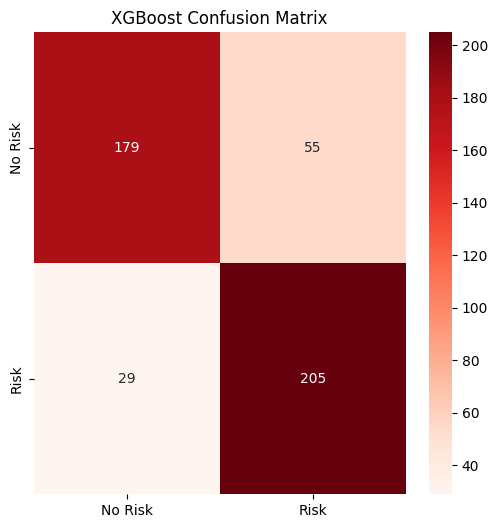

In [ ]:
# XGBOOST CLASSIFIER
from xgboost import XGBClassifier

xgboost_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost Precision: {precision_xgb:.4f}")
print(f"XGBoost Confusion Matrix:\n{cm_xgb}")

plt.figure(figsize=(6, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds', xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.title('XGBoost Confusion Matrix')
plt.show()

Gradient Boosting Accuracy: 0.7842
Gradient Boosting Precision: 0.7714
Confusion Matrix:
[[178  56]
 [ 45 189]]


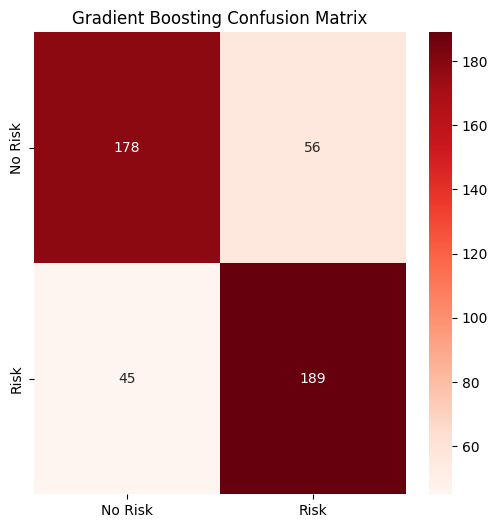

In [ ]:
# GRADIENT BOOSTING CLASSIFIER
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)
y_pred_gb = gradient_boosting.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
cm_gb = confusion_matrix(y_test, y_pred_gb)

print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")
print(f"Gradient Boosting Precision: {precision_gb:.4f}")
print("Confusion Matrix:")
print(cm_gb)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Reds', xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.5641
Logistic Regression Precision: 0.5543
Logistic Regression Confusion Matrix:
[[111 123]
 [ 81 153]]


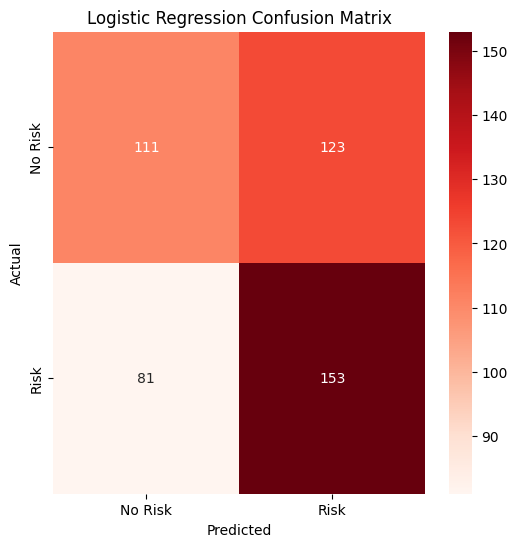

In [ ]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Addressing Class Imbalance with 'class_weight'
logistic_model = LogisticRegression(random_state=42, class_weight='balanced')  # Assigns weights to balance the classes
logistic_model.fit(X_train, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test)

# Metrics
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, zero_division=0)  # Prevent precision errors
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Print Results
print(f"Logistic Regression Accuracy: {accuracy_logistic:.4f}")
print(f"Logistic Regression Precision: {precision_logistic:.4f}")
print(f"Logistic Regression Confusion Matrix:\n{cm_logistic}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Reds', xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Number of positive: 935, number of negative: 935
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 710
[LightGBM] [Info] Number of data points in the train set: 1870, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

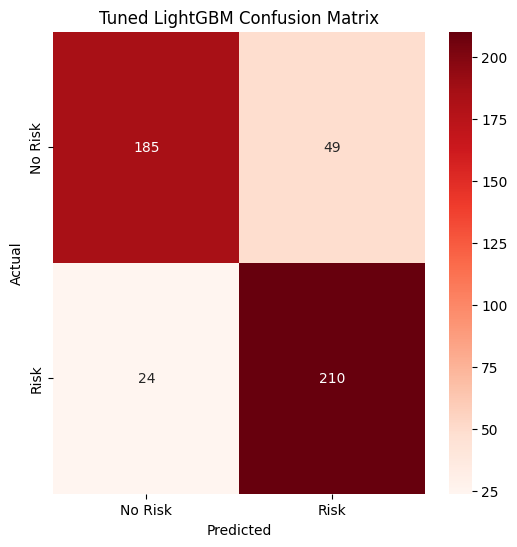

In [ ]:
# Light Gradient Boosting Machine (lightGBM or LGBM)
# Import Light Gradient Boosting Machine (lightGBM) classifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for LightGBM
param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [15, 31, 63, 127],
    'min_child_samples': [10, 20, 30, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0.0, 0.1, 1.0],
    'reg_lambda': [0.0, 0.1, 1.0]
}

# Initialize the LightGBM model
lgbm_model = LGBMClassifier(random_state=42)

# Perform Randomized Search with Cross Validation
random_search = RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=param_dist,
    n_iter=200,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Utilize all available cores
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Best hyperparameters and performance
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

# Train the model using the best hyperparameters
best_lgbm = random_search.best_estimator_
best_lgbm.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_tuned = best_lgbm.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

# Print evaluation metrics
print(f"Tuned LightGBM Accuracy: {accuracy_tuned:.4f}")
print(f"Tuned LightGBM Precision: {precision_tuned:.4f}")
print(f"Tuned Confusion Matrix:\n{cm_tuned}")

# Visualize the tuned confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Reds', xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.title('Tuned LightGBM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#This code performs hyperparameter tuning, training, and evaluation for a LightGBM Classifier to optimize its performance on a given dataset. First, a parameter grid (`param_dist`) is defined, specifying possible values for various hyperparameters such as the number of estimators (`n_estimators`), learning rate (`learning_rate`), maximum tree depth (`max_depth`), number of leaves (`num_leaves`), regularization parameters (`reg_alpha` and `reg_lambda`), and subsampling rates (`subsample` and `colsample_bytree`). The **RandomizedSearchCV** method is used to perform hyperparameter tuning by sampling 200 combinations (`n_iter=200`) of hyperparameters from the grid. This approach uses 5-fold cross-validation (`cv=5`) to evaluate each set of parameters based on accuracy (`scoring='accuracy'`) and leverages parallel processing (`n_jobs=-1`) for faster computation.
#After identifying the best hyperparameters (`random_search.best_params_`), the optimal model (`random_search.best_estimator_`) is retrained on the full training dataset (`X_train`, `y_train`). The model's performance is then evaluated on the test dataset (`X_test`) using metrics such as accuracy (proportion of correct predictions), precision (proportion of true positives among all predicted positives), and the **confusion matrix** (which shows counts of true positives, true negatives, false positives, and false negatives). These metrics provide insight into the model's predictive ability and any biases in classification.
#Finally, a heatmap of the confusion matrix is plotted using Seaborn for a visual representation of the classification results. The code outputs the best hyperparameters, the cross-validation score during tuning, and the final performance metrics (accuracy, precision, and confusion matrix) on the unseen test data. This comprehensive workflow ensures that the model is optimized and thoroughly evaluated before deployment.'''

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00
CatBoost Accuracy: 0.8034
CatBoost Precision: 0.7863
Confusion Matrix:
[[181  53]
 [ 39 195]]


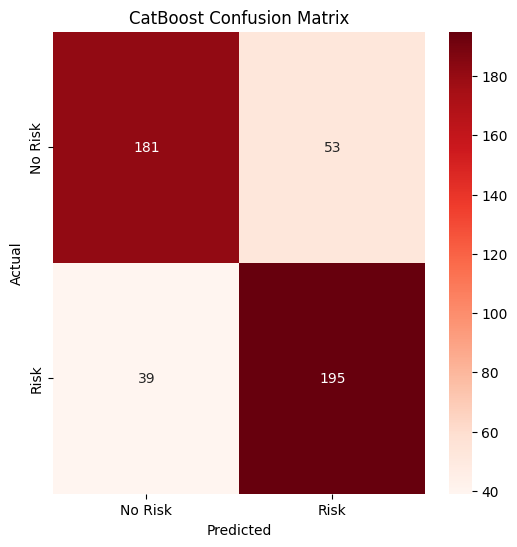

In [ ]:
#CATBOOST
# Import CatBoost Classifier
!pip install catboost
from catboost import CatBoostClassifier

# Initialize and train the CatBoost classifier
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

# Make predictions
y_pred_catboost = catboost_model.predict(X_test)

# Calculate evaluation metrics
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
precision_catboost = precision_score(y_test, y_pred_catboost)
cm_catboost = confusion_matrix(y_test, y_pred_catboost)

# Print evaluation metrics
print(f"CatBoost Accuracy: {accuracy_catboost:.4f}")
print(f"CatBoost Precision: {precision_catboost:.4f}")
print(f"Confusion Matrix:\n{cm_catboost}")

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_catboost, annot=True, fmt='d', cmap='Reds', xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.title('CatBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import pandas as pd

# Create a DataFrame to store results
results = pd.DataFrame({
    "Model": [
        "Random Forest",
        "Decision Tree",
        "XGBoost",
        "Gradient Boosting",
        "Logistic Regression",
        "Tuned LightGBM",
        "CatBoost"
    ],
    "Accuracy": [
        accuracy_rf,
        accuracy_tree,
        accuracy_xgb,
        accuracy_gb,
        accuracy_logistic,
        accuracy_tuned,
        accuracy_catboost
    ],
    "Precision": [
        precision_rf,
        precision_tree,
        precision_xgb,
        precision_gb,
        precision_logistic,
        precision_tuned,
        precision_catboost
    ]
})
# Print the results in a formatted table
print("Model Performance Summary:\n")
print(results.to_string(index=False))

Model Performance Summary:

              Model  Accuracy  Precision
      Random Forest  0.809829   0.784314
      Decision Tree  0.767094   0.743191
            XGBoost  0.820513   0.788462
  Gradient Boosting  0.784188   0.771429
Logistic Regression  0.564103   0.554348
     Tuned LightGBM  0.844017   0.810811
           CatBoost  0.803419   0.786290


In [ ]:
# Here LightGBM model works best both with accuracy and precision

In [ ]:
# Here’s a brief description of each model used in the above code code:

# 1. Random Forest Classifier: A robust ensemble learning method that creates multiple decision trees and merges their results to improve accuracy and prevent overfitting. It’s well-suited for classification tasks and can handle large datasets with high dimensionality.

# 2. Decision Tree Classifier: A simple and interpretable model that splits data based on feature values to make predictions. It can easily overfit with complex datasets but is effective for smaller, well-structured datasets.

# 3. XGBoost Classifier: An optimized gradient boosting algorithm known for its high performance and speed. XGBoost works by combining weak learners (decision trees) to create a strong model and is often used in competitive machine learning tasks due to its accuracy and efficiency.

# 4. Gradient Boosting Classifier: An ensemble technique where weak learners (usually decision trees) are trained sequentially, with each new learner correcting errors made by the previous ones. It's effective for improving model accuracy, but it may be slower to train.

# 5. Logistic Regression: A linear model used for binary classification tasks. It estimates the probability of a class by applying the logistic function to a linear combination of the input features. It's simple but effective, especially for linearly separable data.

# 6. Tuned LightGBM: A highly efficient gradient boosting framework designed for speed and accuracy, especially for large datasets. It uses a histogram-based approach to speed up training and can handle categorical features directly.

# 7. CatBoost Classifier: A gradient boosting algorithm that excels at handling categorical features and minimizes the need for extensive preprocessing. It is designed for efficiency and often outperforms other models in terms of accuracy and training time for categorical data.

In [ ]:
# Here’s a brief description of each evaluation metric used:

#Accuracy: Measures the proportion of correct predictions out of all predictions made. It is a commonly used metric for classification problems but can be misleading if the dataset is imbalanced.

#Precision: Focuses on the positive class and measures the proportion of true positive predictions out of all predicted positives. It is useful when the cost of false positives is high.

#Confusion Matrix: A table used to evaluate the performance of a classification model. It shows the counts of true positives, true negatives, false positives, and false negatives, helping to visualize how well the model distinguishes between classes.